In [16]:
#Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")

In [17]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#Importing the train dataset
train_data = pd.read_csv("C:/Users/ashi.goel/Downloads/Capestone Project/train_dK8Auve.csv")

In [20]:
#Importing test dataset
test_data = pd.read_csv("C:/Users/ashi.goel/Downloads/Capestone Project/test_UyrvqPb.csv")

In [19]:
#checking the head of the data
train_data.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [21]:
test_data.shape

(5045, 22)

In [22]:
#Checking the datatypes of the variables
train_data.dtypes

ID                              object
Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [23]:
#Converting date variables into date type
date_columns = ['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB']

for i in date_columns:
    train_data[i] = pd.to_datetime(train_data[i])

In [24]:
train_data.dtypes

ID                                     object
Office_PIN                              int64
Application_Receipt_Date       datetime64[ns]
Applicant_City_PIN                    float64
Applicant_Gender                       object
Applicant_BirthDate            datetime64[ns]
Applicant_Marital_Status               object
Applicant_Occupation                   object
Applicant_Qualification                object
Manager_DOJ                    datetime64[ns]
Manager_Joining_Designation            object
Manager_Current_Designation            object
Manager_Grade                         float64
Manager_Status                         object
Manager_Gender                         object
Manager_DoB                    datetime64[ns]
Manager_Num_Application               float64
Manager_Num_Coded                     float64
Manager_Business                      float64
Manager_Num_Products                  float64
Manager_Business2                     float64
Manager_Num_Products2             

In [25]:
#Checking null values in the data
train_data.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [26]:
train_data.shape

(9527, 23)

Anatomy of the variables
ID                             : Qualitative
Office_PIN                     : Qualitative
Application_Receipt_Date       : Qualitative
Applicant_City_PIN             : Qualitative
Applicant_Gender               : Categorical
Applicant_BirthDate            : Qualitative
Applicant_Marital_Status       : Categorical
Applicant_Occupation           : Categorical
Applicant_Qualification        : Categorical
Manager_DOJ                    : Qualitative
Manager_Joining_Designation    : Categorical
Manager_Current_Designation    : Categorical
Manager_Grade                  : Categorical
Manager_Status                 : Categorical
Manager_Gender                 : Categorical
Manager_DoB                    : Qualitative
Manager_Num_Application        : Quantitative
Manager_Num_Coded              : Categorical
Manager_Business               : Quantitative
Manager_Num_Products           : Quantitative
Manager_Business2              : Quantitative
Manager_Num_Products2          : Quantitative
Business_Sourced               : Categorical (Target Variable)

In [330]:
train_data.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,...,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,...,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,...,Confirmation,M,1969-03-03,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,...,Confirmation,F,1978-08-14,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,...,Confirmation,M,1971-02-07,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [27]:
test_copy_data = test_data.copy()

In [28]:
test_copy_data.dtypes

ID                              object
Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
dtype: object

In [29]:
for i in date_columns:
    test_copy_data[i] = pd.to_datetime(test_copy_data[i])

In [30]:
#Extracting month and year from the Application Receipt Data
train_data['Application_Receipt_month']=train_data['Application_Receipt_Date'].dt.strftime('%b')
train_data['Application_Receipt_year']=train_data['Application_Receipt_Date'].dt.year

###-----------------------------------------------------------------------------------------###

#Extracting month and year from the Application Receipt Data
test_copy_data['Application_Receipt_month']=test_copy_data['Application_Receipt_Date'].dt.strftime('%b')
test_copy_data['Application_Receipt_year']=test_copy_data['Application_Receipt_Date'].dt.year

In [31]:
#Extracting Applicant and Manager Age from Applicant BirthDate and Manager DOB

today = train_data['Application_Receipt_Date'].dt.year
train_data['Applicant_Age']=today- train_data['Applicant_BirthDate'].dt.year
train_data['Manager_Age']= today- train_data['Manager_DoB'].dt.year
train_data['Manager_YOP']=  today- train_data['Manager_DOJ'].dt.year

#-------------------------------------------------------------------------------------------#

today_test = test_copy_data['Application_Receipt_Date'].dt.year
test_copy_data['Applicant_Age'] = today_test- test_copy_data['Applicant_BirthDate'].dt.year
test_copy_data['Manager_Age'] = today_test - test_copy_data['Manager_DoB'].dt.year
test_copy_data['Manager_YOP'] = today_test - test_copy_data['Manager_DOJ'].dt.year


In [32]:
train_data.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Application_Receipt_month,Application_Receipt_year,Applicant_Age,Manager_Age,Manager_YOP
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,...,335249.0,28.0,335249.0,28.0,0,Apr,2007,36.0,29.0,2.0
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,...,335249.0,28.0,335249.0,28.0,1,Apr,2007,24.0,29.0,2.0
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,...,357184.0,24.0,357184.0,24.0,0,Apr,2007,41.0,38.0,1.0
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,...,318356.0,22.0,318356.0,22.0,0,Apr,2007,19.0,29.0,4.0
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,...,230402.0,17.0,230402.0,17.0,0,Apr,2007,22.0,36.0,1.0


In [33]:
test_copy_data.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Application_Receipt_month,Application_Receipt_year,Applicant_Age,Manager_Age,Manager_YOP
0,FIN1009528,284001,2008-07-02,284001.0,M,1982-08-05,S,Salaried,Graduate,2008-05-26,...,0.0,0.0,0.0,0.0,0.0,Jul,2008,26.0,30.0,0.0
1,FIN1009529,800001,2008-07-02,800026.0,M,1968-03-11,M,Salaried,Graduate,2008-06-24,...,0.0,0.0,0.0,0.0,0.0,Jul,2008,40.0,37.0,0.0
2,FIN1009530,800001,2008-07-02,NaN,M,1984-12-16,S,NaN,Graduate,NaT,...,NaN,NaN,NaN,NaN,NaN,Jul,2008,24.0,NaN,NaN
3,FIN1009531,800001,2008-07-02,844112.0,M,1971-06-07,S,Salaried,Graduate,NaT,...,NaN,NaN,NaN,NaN,NaN,Jul,2008,37.0,NaN,NaN
4,FIN1009532,533101,2008-07-02,533102.0,M,1978-07-22,S,NaN,Masters of Business Administration,2007-12-04,...,1.0,97352.0,3.0,97352.0,3.0,Jul,2008,30.0,31.0,1.0


In [338]:
train_data.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced', 'Application_Receipt_month',
       'Application_Receipt_year', 'Applicant_Age', 'Manager_Age',
       'Manager_YOP'],
      dtype='object')

In [34]:
#Removing useless columns from the data
useless_columns = ['ID','Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB']

train_data.drop(useless_columns,axis=1,inplace=True)

In [35]:
train_data.shape

(9527, 23)

In [36]:
test_copy_data.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Application_Receipt_month', 'Application_Receipt_year',
       'Applicant_Age', 'Manager_Age', 'Manager_YOP'],
      dtype='object')

In [37]:
#Removing useless columns from the test data
test_copy_data.drop(useless_columns,axis=1,inplace=True)

In [38]:
test_copy_data.shape

(5045, 22)

# Missing Value treatment of train data and test data

In [39]:
train_data.isnull().sum()

Office_PIN                        0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
Application_Receipt_month         0
Application_Receipt_year          0
Applicant_Age                    73
Manager_Age                     683
Manager_YOP                     683
dtype: int64

In [41]:
cont_cols = ['Office_PIN', 'Applicant_City_PIN','Manager_Num_Application','Manager_Business', 'Manager_Num_Products', 'Manager_Business2',
       'Manager_Num_Products2',
       'Applicant_Age', 'Manager_Age']

cat_cols = ['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation',
       'Applicant_Qualification', 'Manager_Joining_Designation',
       'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status',
       'Manager_Gender','Manager_Num_Coded','Application_Receipt_month', 'Manager_YOP','Application_Receipt_year']

In [42]:
for i in cat_cols:
    train_data[i] = train_data[i].astype('category')

In [43]:
train_data.dtypes

Office_PIN                        int64
Applicant_City_PIN              float64
Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Grade                  category
Manager_Status                 category
Manager_Gender                 category
Manager_Num_Application         float64
Manager_Num_Coded              category
Manager_Business                float64
Manager_Num_Products            float64
Manager_Business2               float64
Manager_Num_Products2           float64
Business_Sourced                  int64
Application_Receipt_month      category
Application_Receipt_year       category
Applicant_Age                   float64
Manager_Age                     float64
Manager_YOP                    category
dtype: object

In [44]:
train_data['Business_Sourced'] = train_data['Business_Sourced'].astype('category')

In [45]:
#Replacing missing values with mode and median
train_data['Applicant_Gender'].fillna(train_data['Applicant_Gender'].mode()[0],inplace=True)

train_data['Applicant_City_PIN'].fillna(train_data['Applicant_City_PIN'].mode()[0], inplace = True)

train_data['Applicant_Marital_Status'].fillna(train_data['Applicant_Marital_Status'].mode()[0],inplace=True)

train_data['Applicant_Occupation'].fillna(train_data['Applicant_Occupation'].mode()[0],inplace=True)

train_data['Applicant_Qualification'].fillna(train_data['Applicant_Qualification'].mode()[0],inplace=True)

train_data['Manager_Joining_Designation'].fillna(train_data['Manager_Joining_Designation'].mode()[0],inplace=True)

train_data['Manager_Current_Designation'].fillna(train_data['Manager_Current_Designation'].mode()[0],inplace=True)

train_data['Manager_Grade'].fillna(train_data['Manager_Grade'].mode()[0],inplace=True)

train_data['Manager_Status'].fillna(train_data['Manager_Status'].mode()[0],inplace=True)

train_data['Manager_Gender'].fillna(train_data['Manager_Gender'].mode()[0],inplace=True)

train_data['Manager_Num_Coded'].fillna(train_data['Manager_Num_Coded'].mode()[0],inplace=True)

train_data['Manager_YOP'].fillna(train_data['Manager_YOP'].mode()[0],inplace=True)

train_data['Manager_Num_Application'].fillna(train_data['Manager_Num_Application'].median(),inplace=True)

train_data['Manager_Business'].fillna(train_data['Manager_Business'].median(),inplace=True)

train_data['Manager_Business2'].fillna(train_data['Manager_Business2'].median(),inplace=True)

train_data['Manager_Num_Products'].fillna(train_data['Manager_Num_Products'].median(),inplace=True)

train_data['Manager_Num_Products2'].fillna(train_data['Manager_Num_Products2'].median(),inplace=True)

train_data['Applicant_Age'].fillna(train_data['Applicant_Age'].median(),inplace=True)

train_data['Manager_Age'].fillna(train_data['Manager_Age'].median(),inplace=True)


In [46]:
train_data.isnull().sum()

Office_PIN                     0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
Application_Receipt_month      0
Application_Receipt_year       0
Applicant_Age                  0
Manager_Age                    0
Manager_YOP                    0
dtype: int64

In [49]:
test_copy_data.isnull().sum()

Office_PIN                        0
Applicant_City_PIN               34
Applicant_Gender                 22
Applicant_Marital_Status         30
Applicant_Occupation           1004
Applicant_Qualification          44
Manager_Joining_Designation     824
Manager_Current_Designation     824
Manager_Grade                   824
Manager_Status                  824
Manager_Gender                  824
Manager_Num_Application         824
Manager_Num_Coded               824
Manager_Business                824
Manager_Num_Products            824
Manager_Business2               824
Manager_Num_Products2           824
Application_Receipt_month         0
Application_Receipt_year          0
Applicant_Age                    23
Manager_Age                     824
Manager_YOP                     824
dtype: int64

In [47]:
test_copy_data.dtypes

Office_PIN                       int64
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Application_Receipt_month       object
Application_Receipt_year         int64
Applicant_Age                  float64
Manager_Age                    float64
Manager_YOP                    float64
dtype: object

In [48]:
for i in cat_cols:
    test_copy_data[i] = test_copy_data[i].astype('category')

In [50]:
#Replacing missing values with mode and median of test data
test_copy_data['Applicant_Gender'].fillna(test_copy_data['Applicant_Gender'].mode()[0],inplace=True)

test_copy_data['Applicant_City_PIN'].fillna(test_copy_data['Applicant_City_PIN'].mode()[0], inplace = True)

test_copy_data['Applicant_Marital_Status'].fillna(test_copy_data['Applicant_Marital_Status'].mode()[0],inplace=True)

test_copy_data['Applicant_Occupation'].fillna(test_copy_data['Applicant_Occupation'].mode()[0],inplace=True)

test_copy_data['Applicant_Qualification'].fillna(test_copy_data['Applicant_Qualification'].mode()[0],inplace=True)

test_copy_data['Manager_Joining_Designation'].fillna(test_copy_data['Manager_Joining_Designation'].mode()[0],inplace=True)

test_copy_data['Manager_Current_Designation'].fillna(test_copy_data['Manager_Current_Designation'].mode()[0],inplace=True)

test_copy_data['Manager_Grade'].fillna(test_copy_data['Manager_Grade'].mode()[0],inplace=True)

test_copy_data['Manager_Status'].fillna(test_copy_data['Manager_Status'].mode()[0],inplace=True)

test_copy_data['Manager_Gender'].fillna(test_copy_data['Manager_Gender'].mode()[0],inplace=True)

test_copy_data['Manager_Num_Coded'].fillna(test_copy_data['Manager_Num_Coded'].mode()[0],inplace=True)

test_copy_data['Manager_YOP'].fillna(test_copy_data['Manager_YOP'].mode()[0],inplace=True)

test_copy_data['Manager_Num_Application'].fillna(test_copy_data['Manager_Num_Application'].median(),inplace=True)

test_copy_data['Manager_Business'].fillna(test_copy_data['Manager_Business'].median(),inplace=True)

test_copy_data['Manager_Business2'].fillna(test_copy_data['Manager_Business2'].median(),inplace=True)

test_copy_data['Manager_Num_Products'].fillna(test_copy_data['Manager_Num_Products'].median(),inplace=True)

test_copy_data['Manager_Num_Products2'].fillna(test_copy_data['Manager_Num_Products2'].median(),inplace=True)

test_copy_data['Applicant_Age'].fillna(test_copy_data['Applicant_Age'].median(),inplace=True)

test_copy_data['Manager_Age'].fillna(test_copy_data['Manager_Age'].median(),inplace=True)

In [51]:
test_copy_data.isnull().sum()

Office_PIN                     0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Application_Receipt_month      0
Application_Receipt_year       0
Applicant_Age                  0
Manager_Age                    0
Manager_YOP                    0
dtype: int64

# Univariate Analysis of the train data

In [52]:
cont_cols = ['Manager_Num_Application','Manager_Business', 'Manager_Num_Products', 'Manager_Business2',
       'Manager_Num_Products2',
       'Applicant_Age', 'Manager_Age','Office_PIN', 'Applicant_City_PIN']

cat_cols = ['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation',
       'Applicant_Qualification', 'Manager_Joining_Designation',
       'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status',
       'Manager_Gender','Manager_Num_Coded','Application_Receipt_month', 'Manager_YOP','Application_Receipt_year']

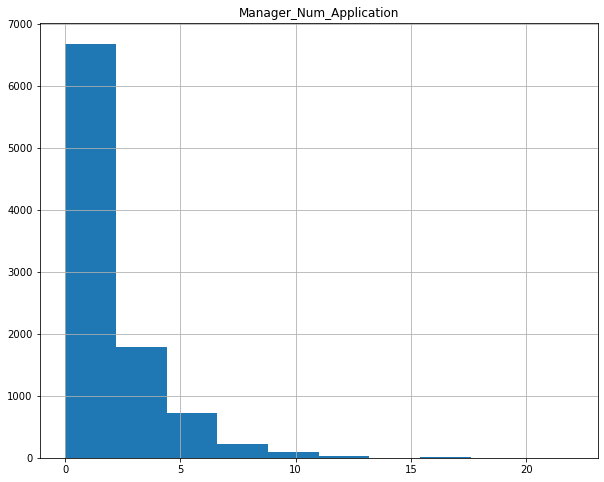

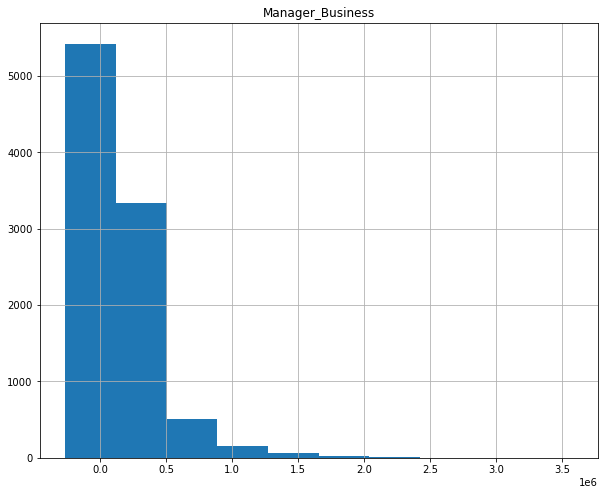

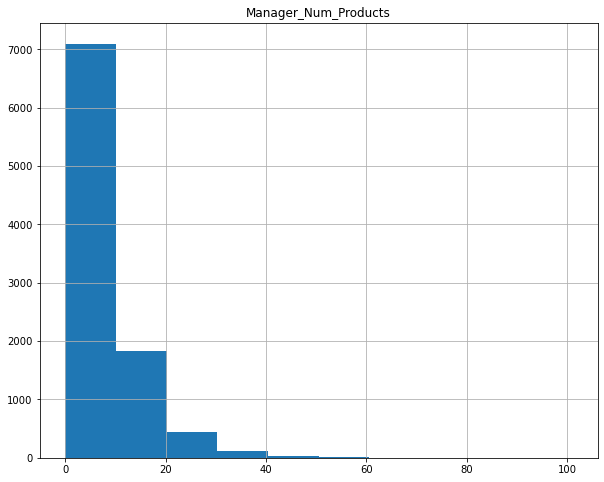

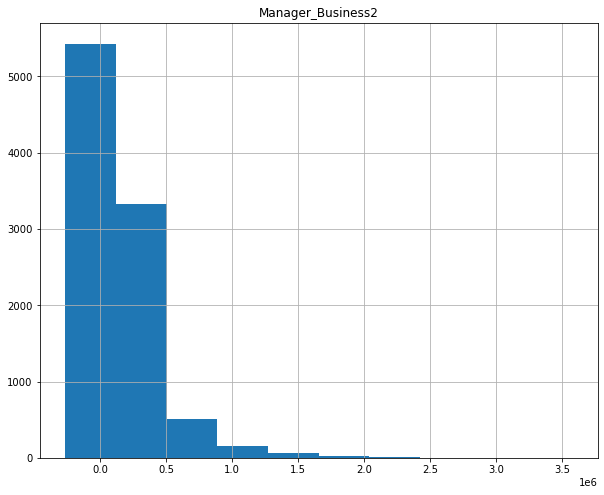

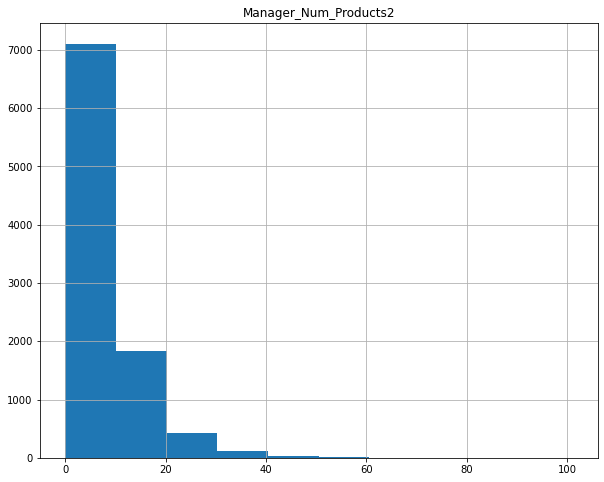

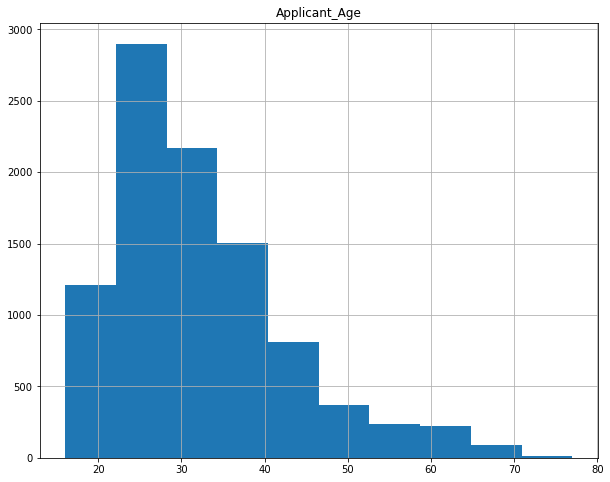

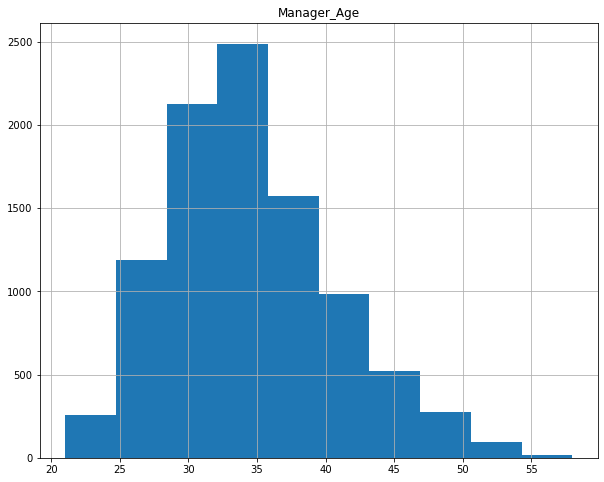

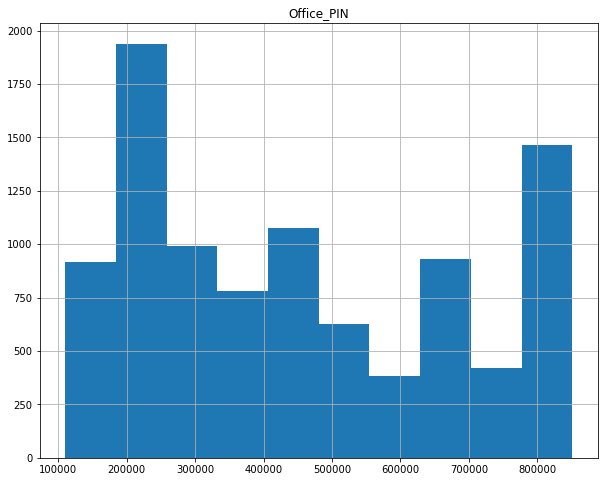

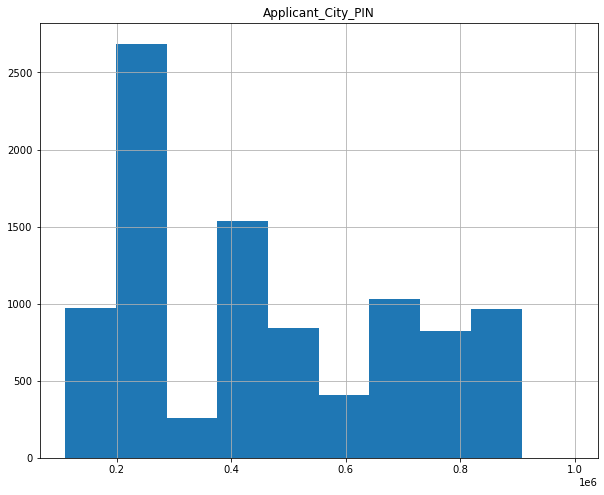

In [53]:
#Visualizing distribution of Quantitaive variables through histogram
for i in cont_cols:
    train_data.hist([i],figsize=(10,8))

In [54]:
train_data['Manager_Num_Application'][train_data['Manager_Num_Application']<16].sort_values(ascending=False)

4939    14.0
3845    13.0
4159    13.0
699     13.0
1154    13.0
        ... 
2675     0.0
6939     0.0
6940     0.0
6941     0.0
2043     0.0
Name: Manager_Num_Application, Length: 9520, dtype: float64

In [55]:
train_data['Manager_Num_Application'][train_data['Manager_Num_Application']>14] = 14

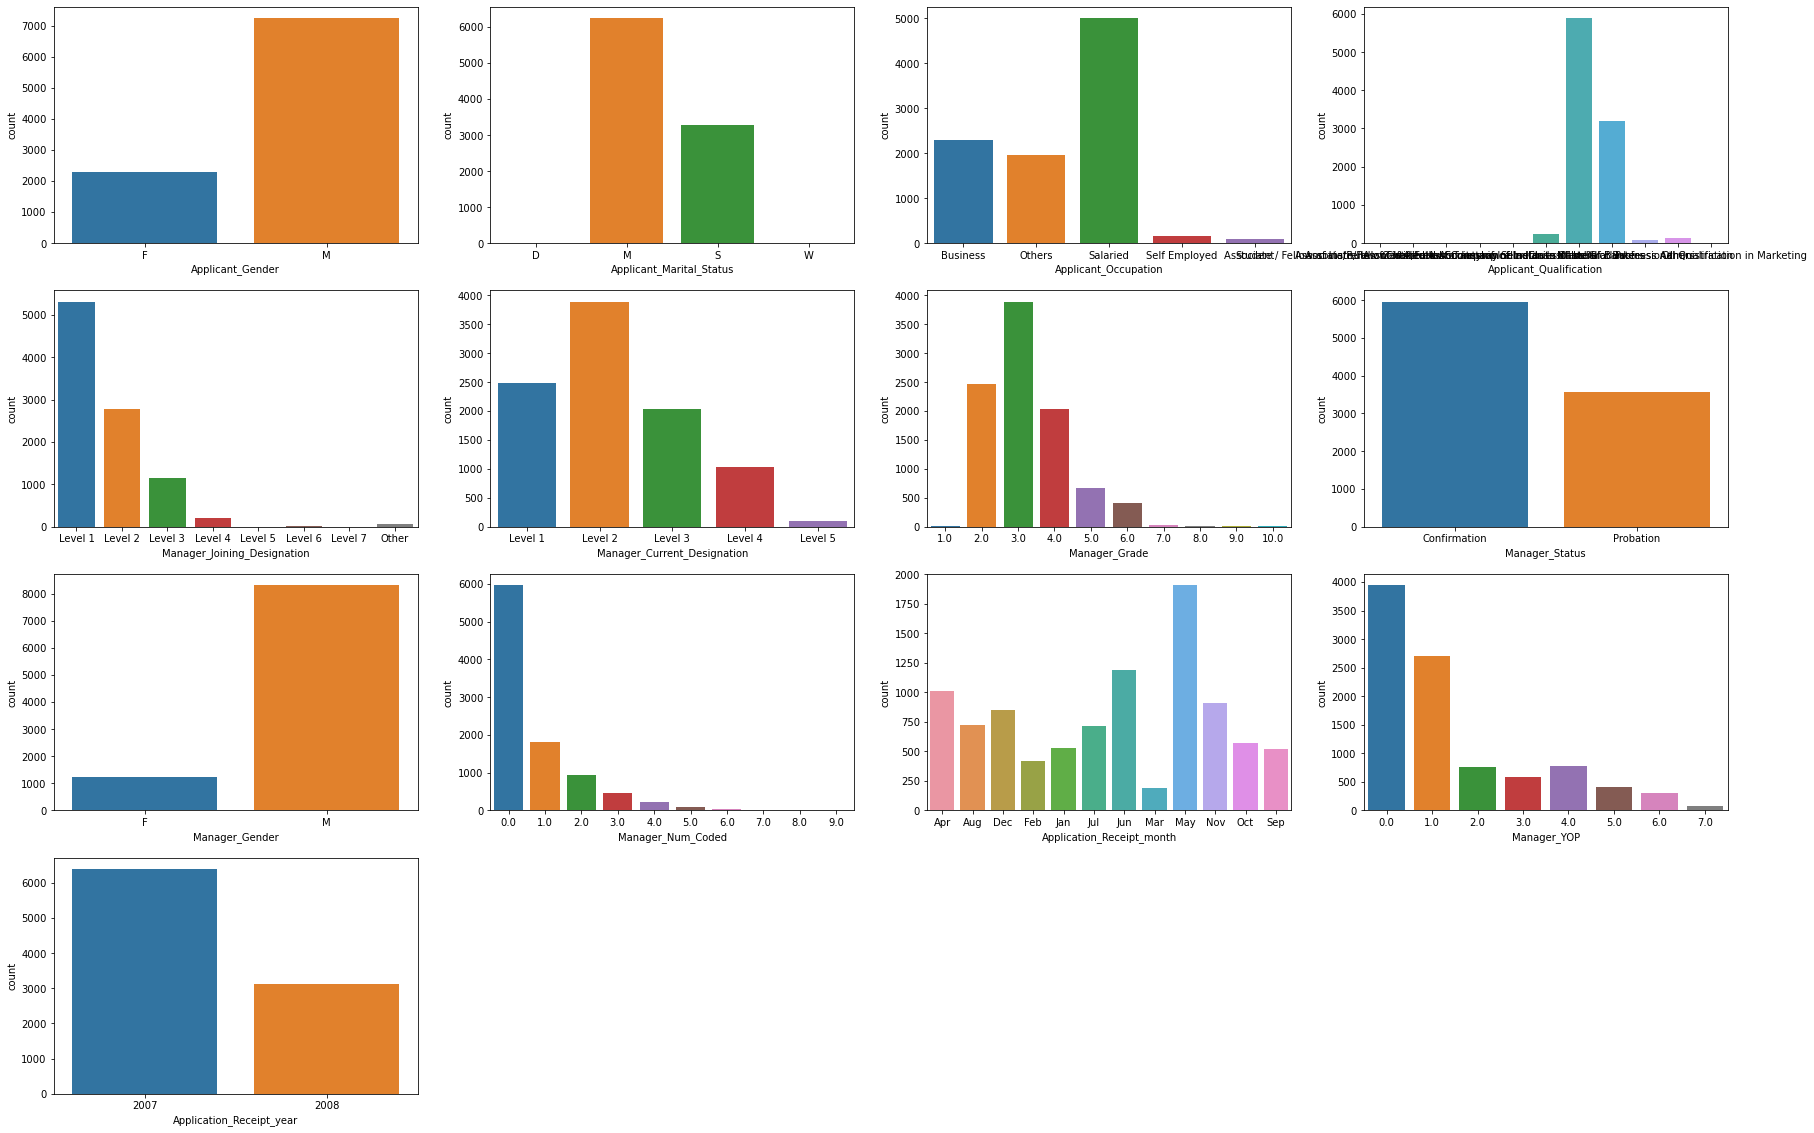

In [56]:
#Visualizing the distribution of categorical variables through Bar Grapgh
plt.figure(figsize=(30,20))
for i,feature in enumerate(cat_cols):
    plt.subplot(4,4,i+1)
    sns.countplot(train_data[feature])

In [57]:
#Removing outliers of the categorical columns
train_data['Applicant_Marital_Status'].replace({'W':'S','D':'S'},inplace=True)
train_data['Applicant_Occupation'].replace({'Self Employed':'Others','Student':'Others'},inplace=True)

<AxesSubplot:xlabel='Applicant_Qualification', ylabel='count'>

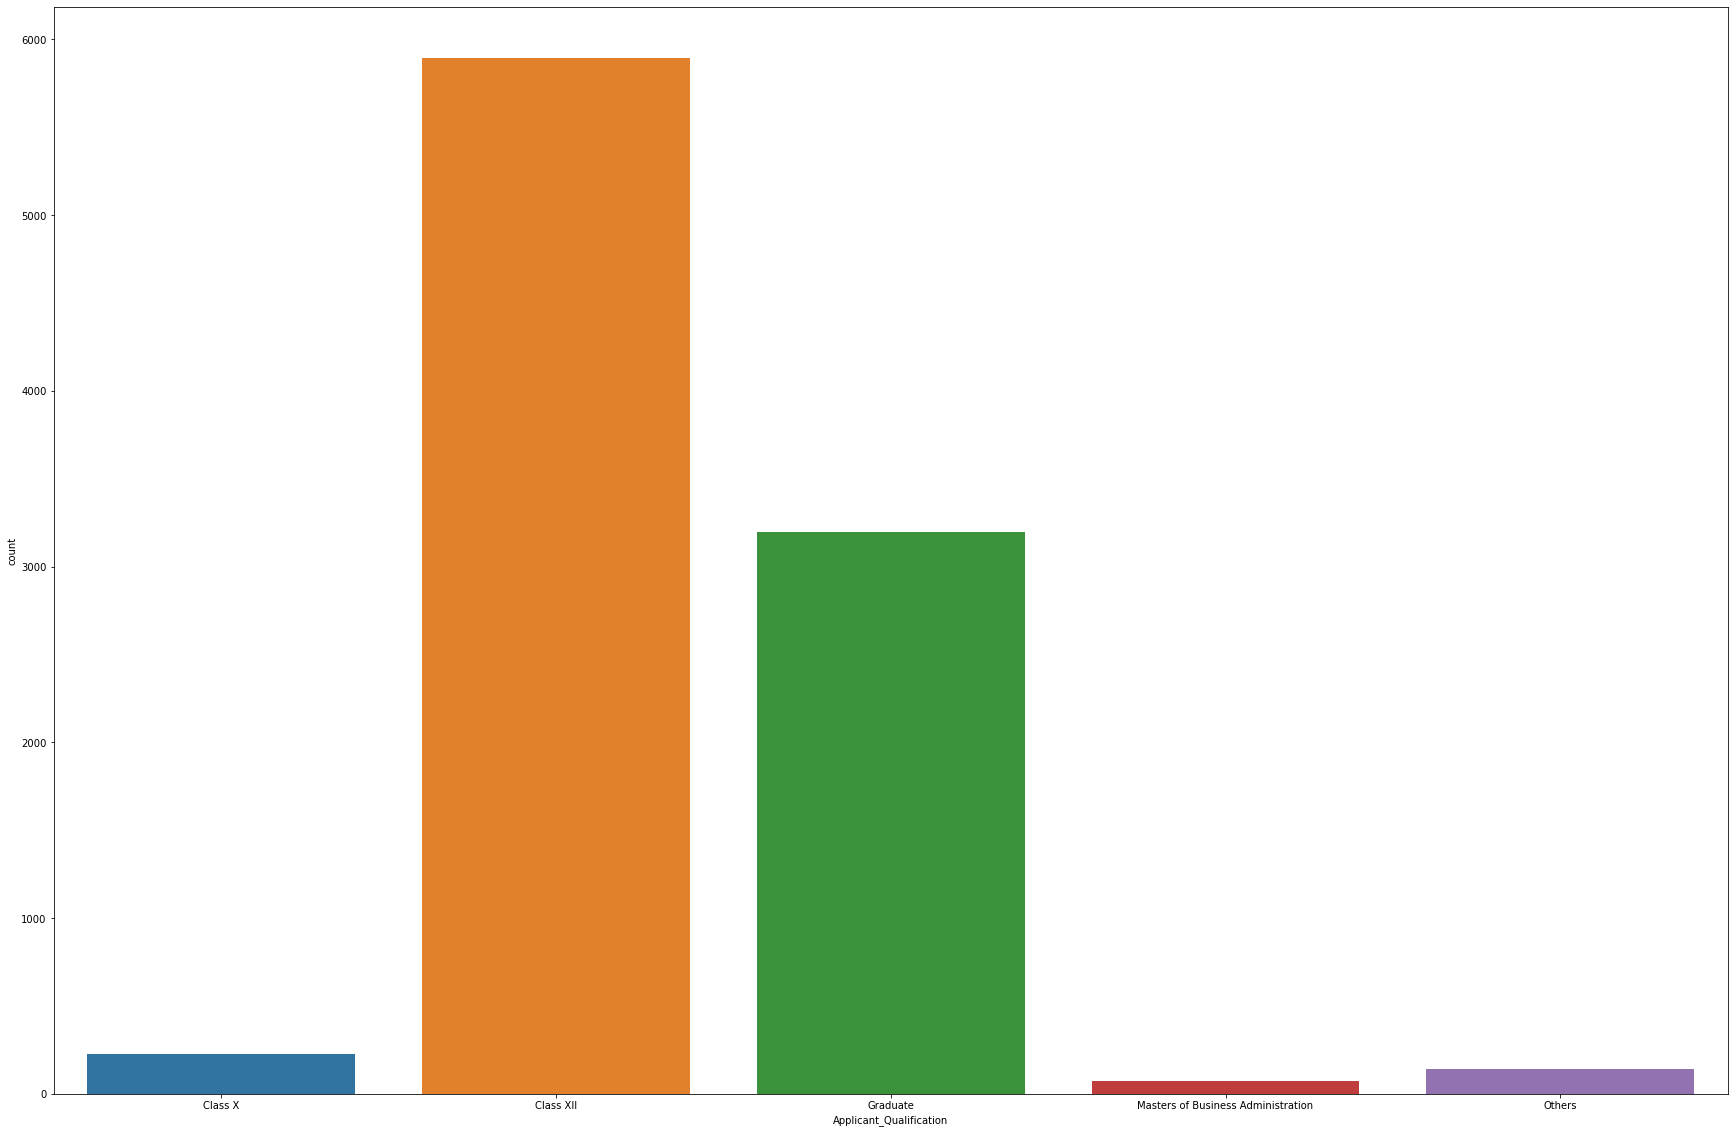

In [135]:
plt.figure(figsize=(30,20))
sns.countplot(train_data['Applicant_Qualification'])

In [58]:
#Removing outliers of the Applicant Qualification column
train_data['Applicant_Qualification'].replace({'Associate/Fellow of Institute of Company Secretories of India':'Others'},inplace=True)
train_data['Applicant_Qualification'].replace({'Associate / Fellow of Institute of Chartered Accountans of India':'Others'},inplace=True)
train_data['Applicant_Qualification'].replace({'Associate/Fellow of Insurance Institute of India':'Others'},inplace=True)
train_data['Applicant_Qualification'].replace({'Associate/Fellow of Acturial Society of India':'Others'},inplace=True)
train_data['Applicant_Qualification'].replace({'Certified Associateship of Indian Institute of Bankers':'Others'},inplace=True)
train_data['Applicant_Qualification'].replace({'Professional Qualification in Marketing':'Others'},inplace=True)

# Univariate Analysis of the Test Data

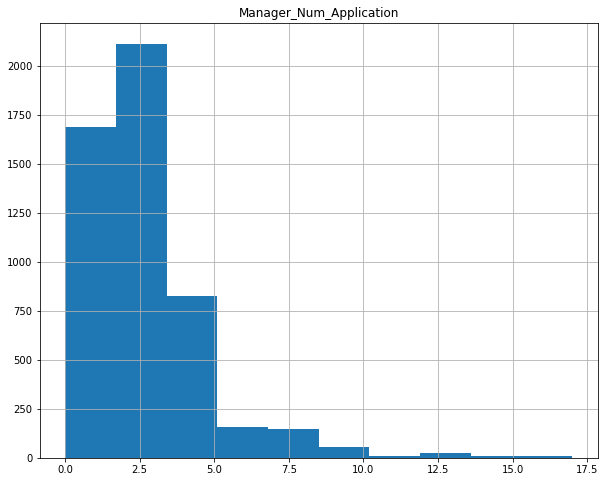

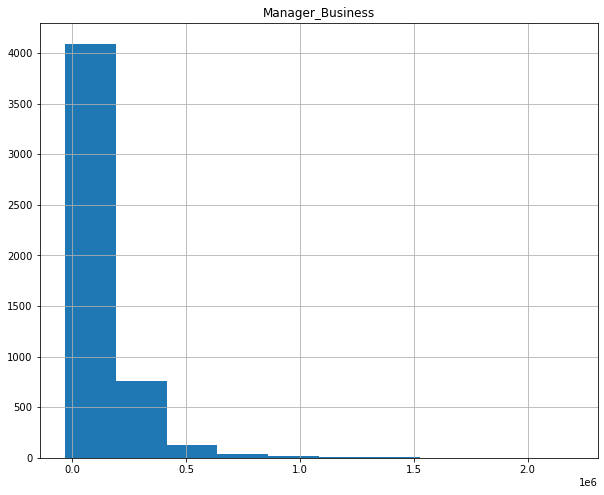

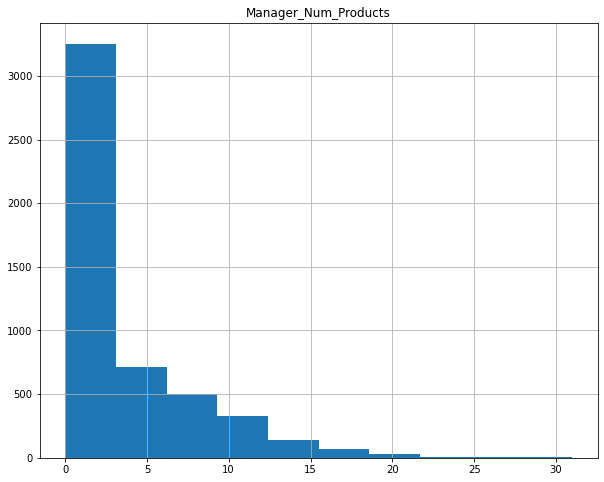

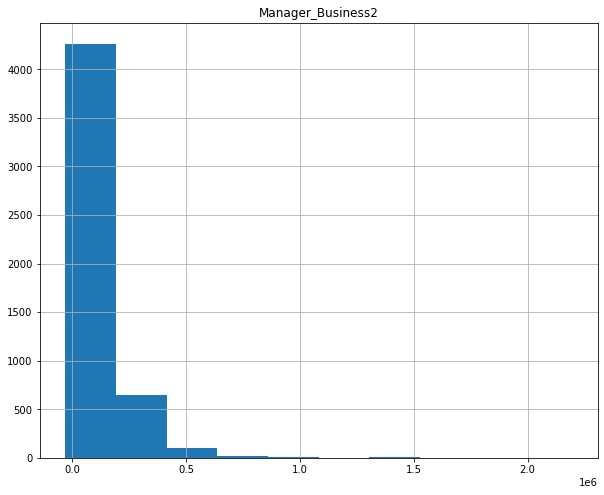

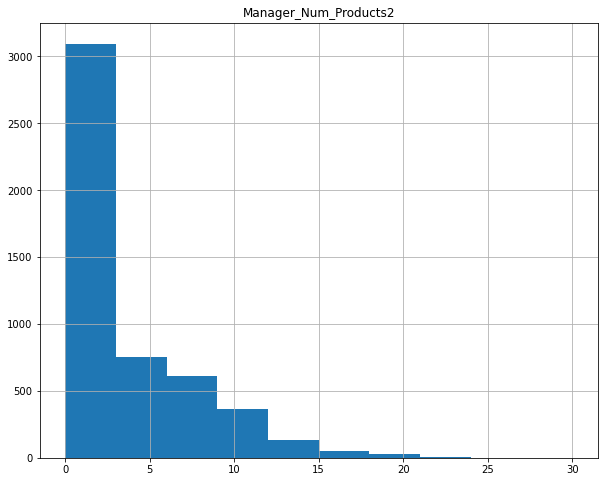

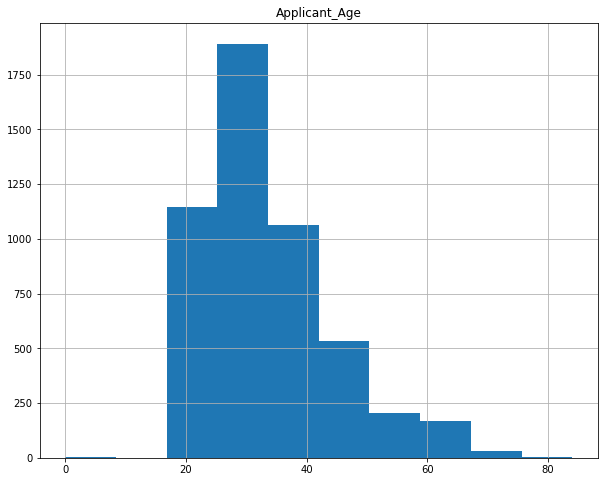

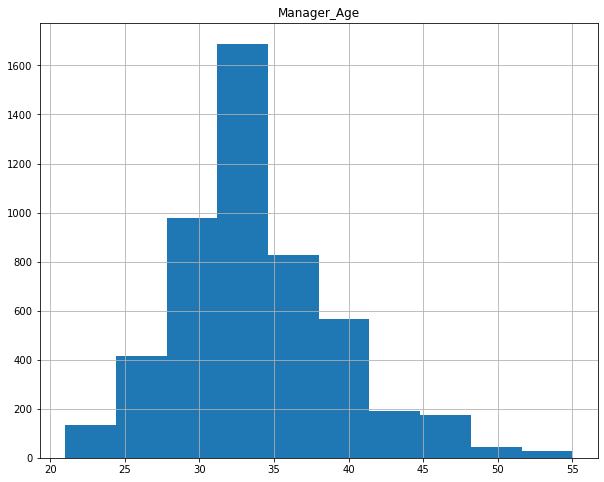

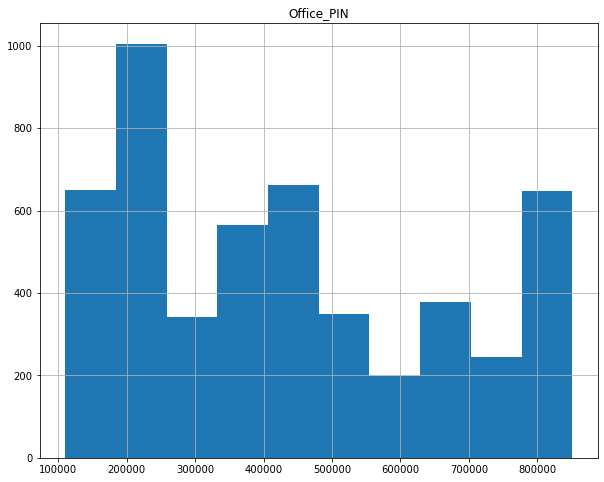

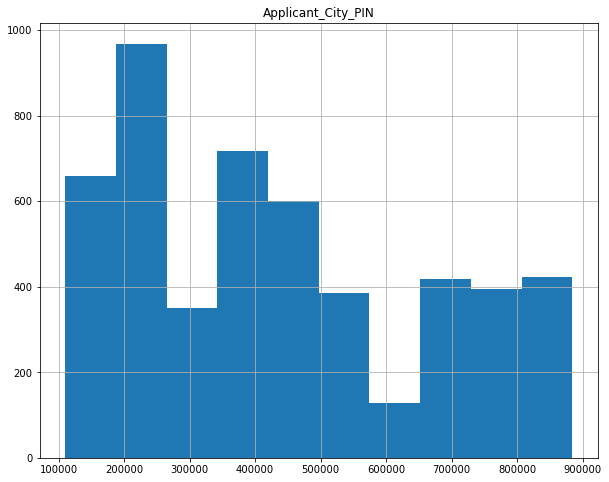

In [59]:
#Visualizing distribution of Quantitaive variables of test data through histogram
for i in cont_cols:
    test_copy_data.hist([i],figsize=(10,8))

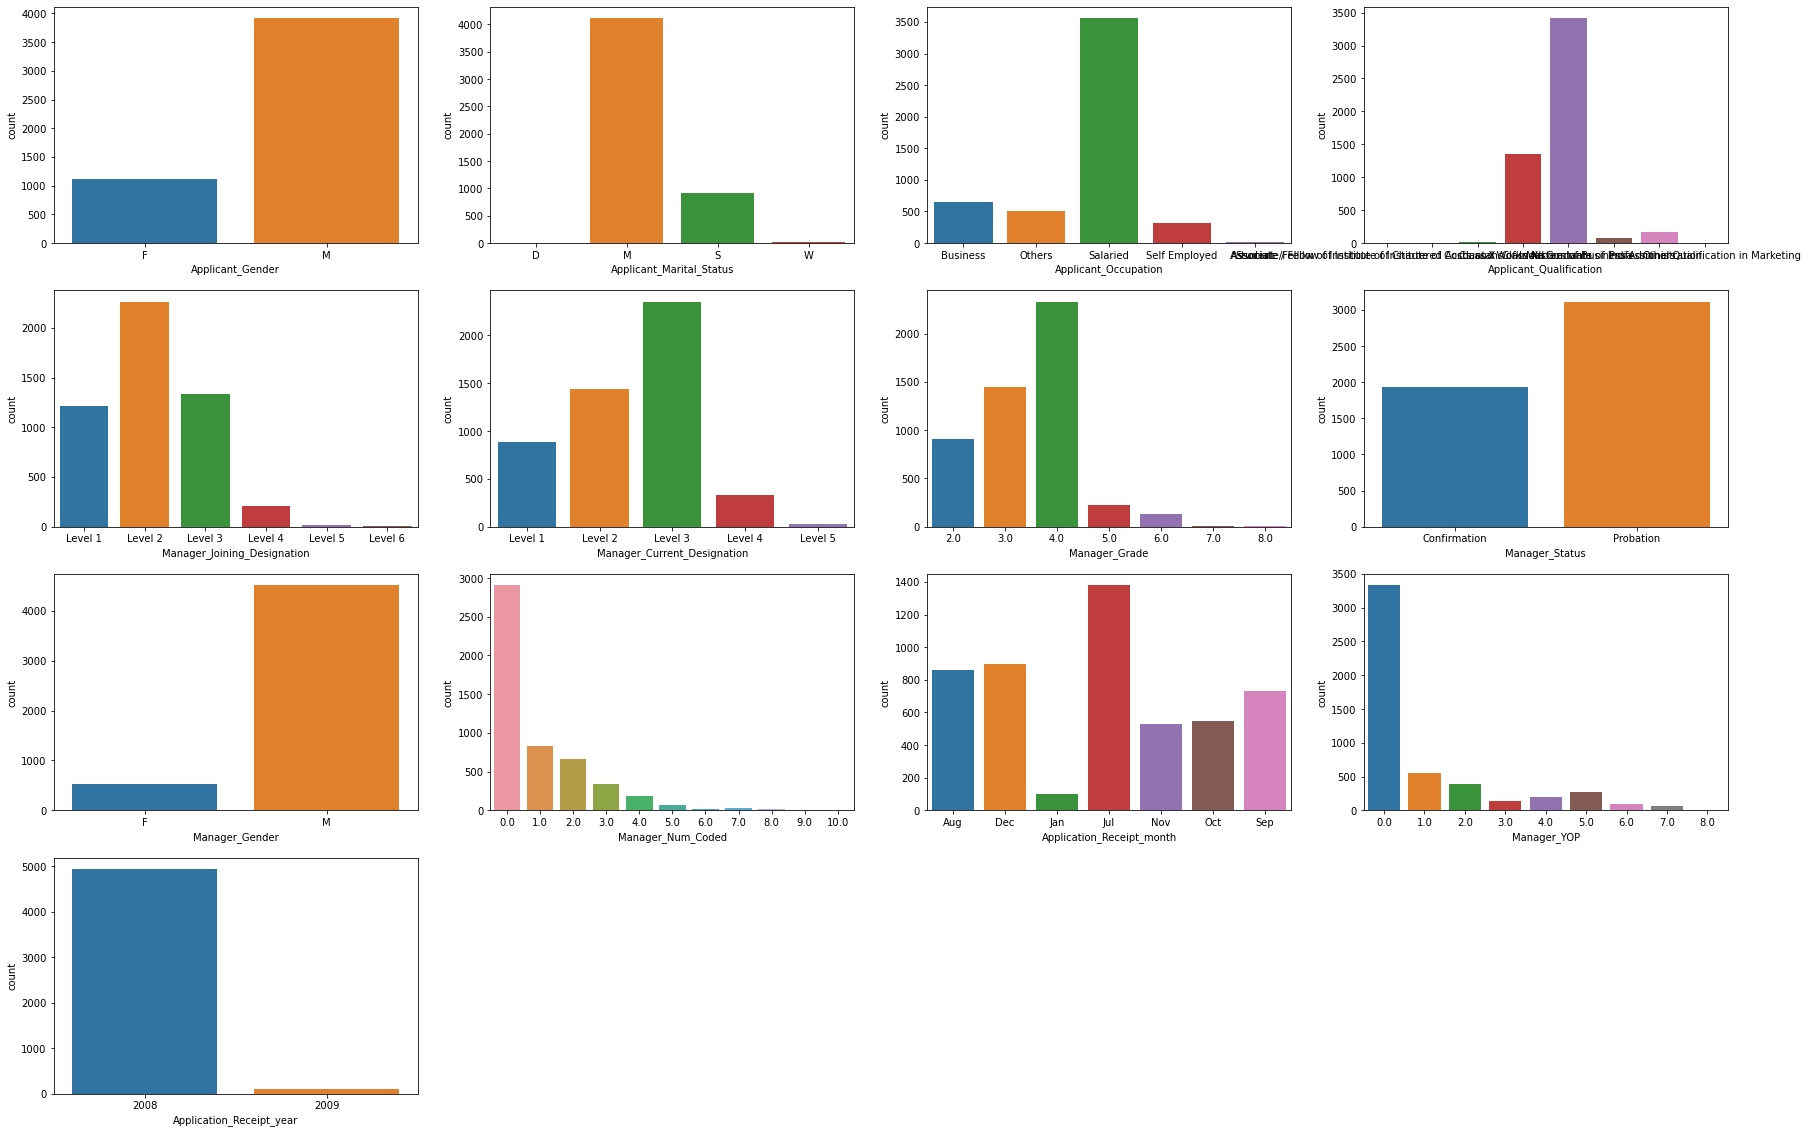

In [60]:
#Visualizing the distribution of categorical variables of test data  through Bar Grapgh
plt.figure(figsize=(30,20))
for i,feature in enumerate(cat_cols):
    plt.subplot(4,4,i+1)
    sns.countplot(test_copy_data[feature])

In [61]:
#Removing outliers of the categorical columns
test_copy_data['Applicant_Marital_Status'].replace({'W':'S','D':'S'},inplace=True)
test_copy_data['Applicant_Occupation'].replace({'Self Employed':'Others','Student':'Others'},inplace=True)


In [62]:
test_copy_data['Applicant_Qualification'].replace({'Associate/Fellow of Institute of Company Secretories of India':'Others'},inplace=True)
test_copy_data['Applicant_Qualification'].replace({'Associate / Fellow of Institute of Chartered Accountans of India':'Others'},inplace=True)
test_copy_data['Applicant_Qualification'].replace({'Associate/Fellow of Insurance Institute of India':'Others'},inplace=True)
test_copy_data['Applicant_Qualification'].replace({'Associate/Fellow of Acturial Society of India':'Others'},inplace=True)
test_copy_data['Applicant_Qualification'].replace({'Certified Associateship of Indian Institute of Bankers':'Others'},inplace=True)
test_copy_data['Applicant_Qualification'].replace({'Professional Qualification in Marketing':'Others'},inplace=True)
test_copy_data['Applicant_Qualification'].replace({'Associate/Fellow of Institute of Institute of Costs and Works Accountants of India':'Others'},inplace=True)

In [63]:
#Creating bins of age
def agefunc(age):
    if age>=18 and age<=37:
        return "Young"
    elif age>=38 and age<=57:
        return "Middle Aged"
    else:
        return "Senior"
train_data['Applicant_Age_Bin']=train_data['Applicant_Age'].apply(agefunc)
test_copy_data['Applicant_Age_Bin']=test_copy_data['Applicant_Age'].apply(agefunc)
train_data['Manager_Age_Bin']=train_data['Manager_Age'].apply(agefunc)
test_copy_data['Manager_Age_Bin']=test_copy_data['Manager_Age'].apply(agefunc)

In [64]:
train_data['Applicant_Age_Bin'].value_counts(), test_copy_data['Applicant_Age_Bin'].value_counts()

(Young          7097
 Middle Aged    2058
 Senior          372
 Name: Applicant_Age_Bin, dtype: int64,
 Young          3657
 Middle Aged    1159
 Senior          229
 Name: Applicant_Age_Bin, dtype: int64)

In [65]:
train_data['Manager_Age_Bin'].value_counts(), test_copy_data['Manager_Age_Bin'].value_counts()

(Young          6914
 Middle Aged    2608
 Senior            5
 Name: Manager_Age_Bin, dtype: int64,
 Young          4041
 Middle Aged    1004
 Name: Manager_Age_Bin, dtype: int64)

In [66]:
train_data['Manager_Age_Bin'].replace({'Senior':'Middle Aged'},inplace=True)

In [70]:
train_data.shape, test_copy_data.shape

((9527, 23), (5045, 22))

In [68]:
train_data.drop(['Applicant_Age','Manager_Age'],axis=1,inplace=True)

In [69]:
test_copy_data.drop(['Applicant_Age','Manager_Age'],axis=1,inplace=True)

In [86]:
cont_cols = ['Manager_Num_Application',
 'Manager_Business',
 'Manager_Num_Products',
 'Manager_Business2',
 'Manager_Num_Products2',
 'Office_PIN',
 'Applicant_City_PIN']


# Bivariate Analysis of predictors with the target variable

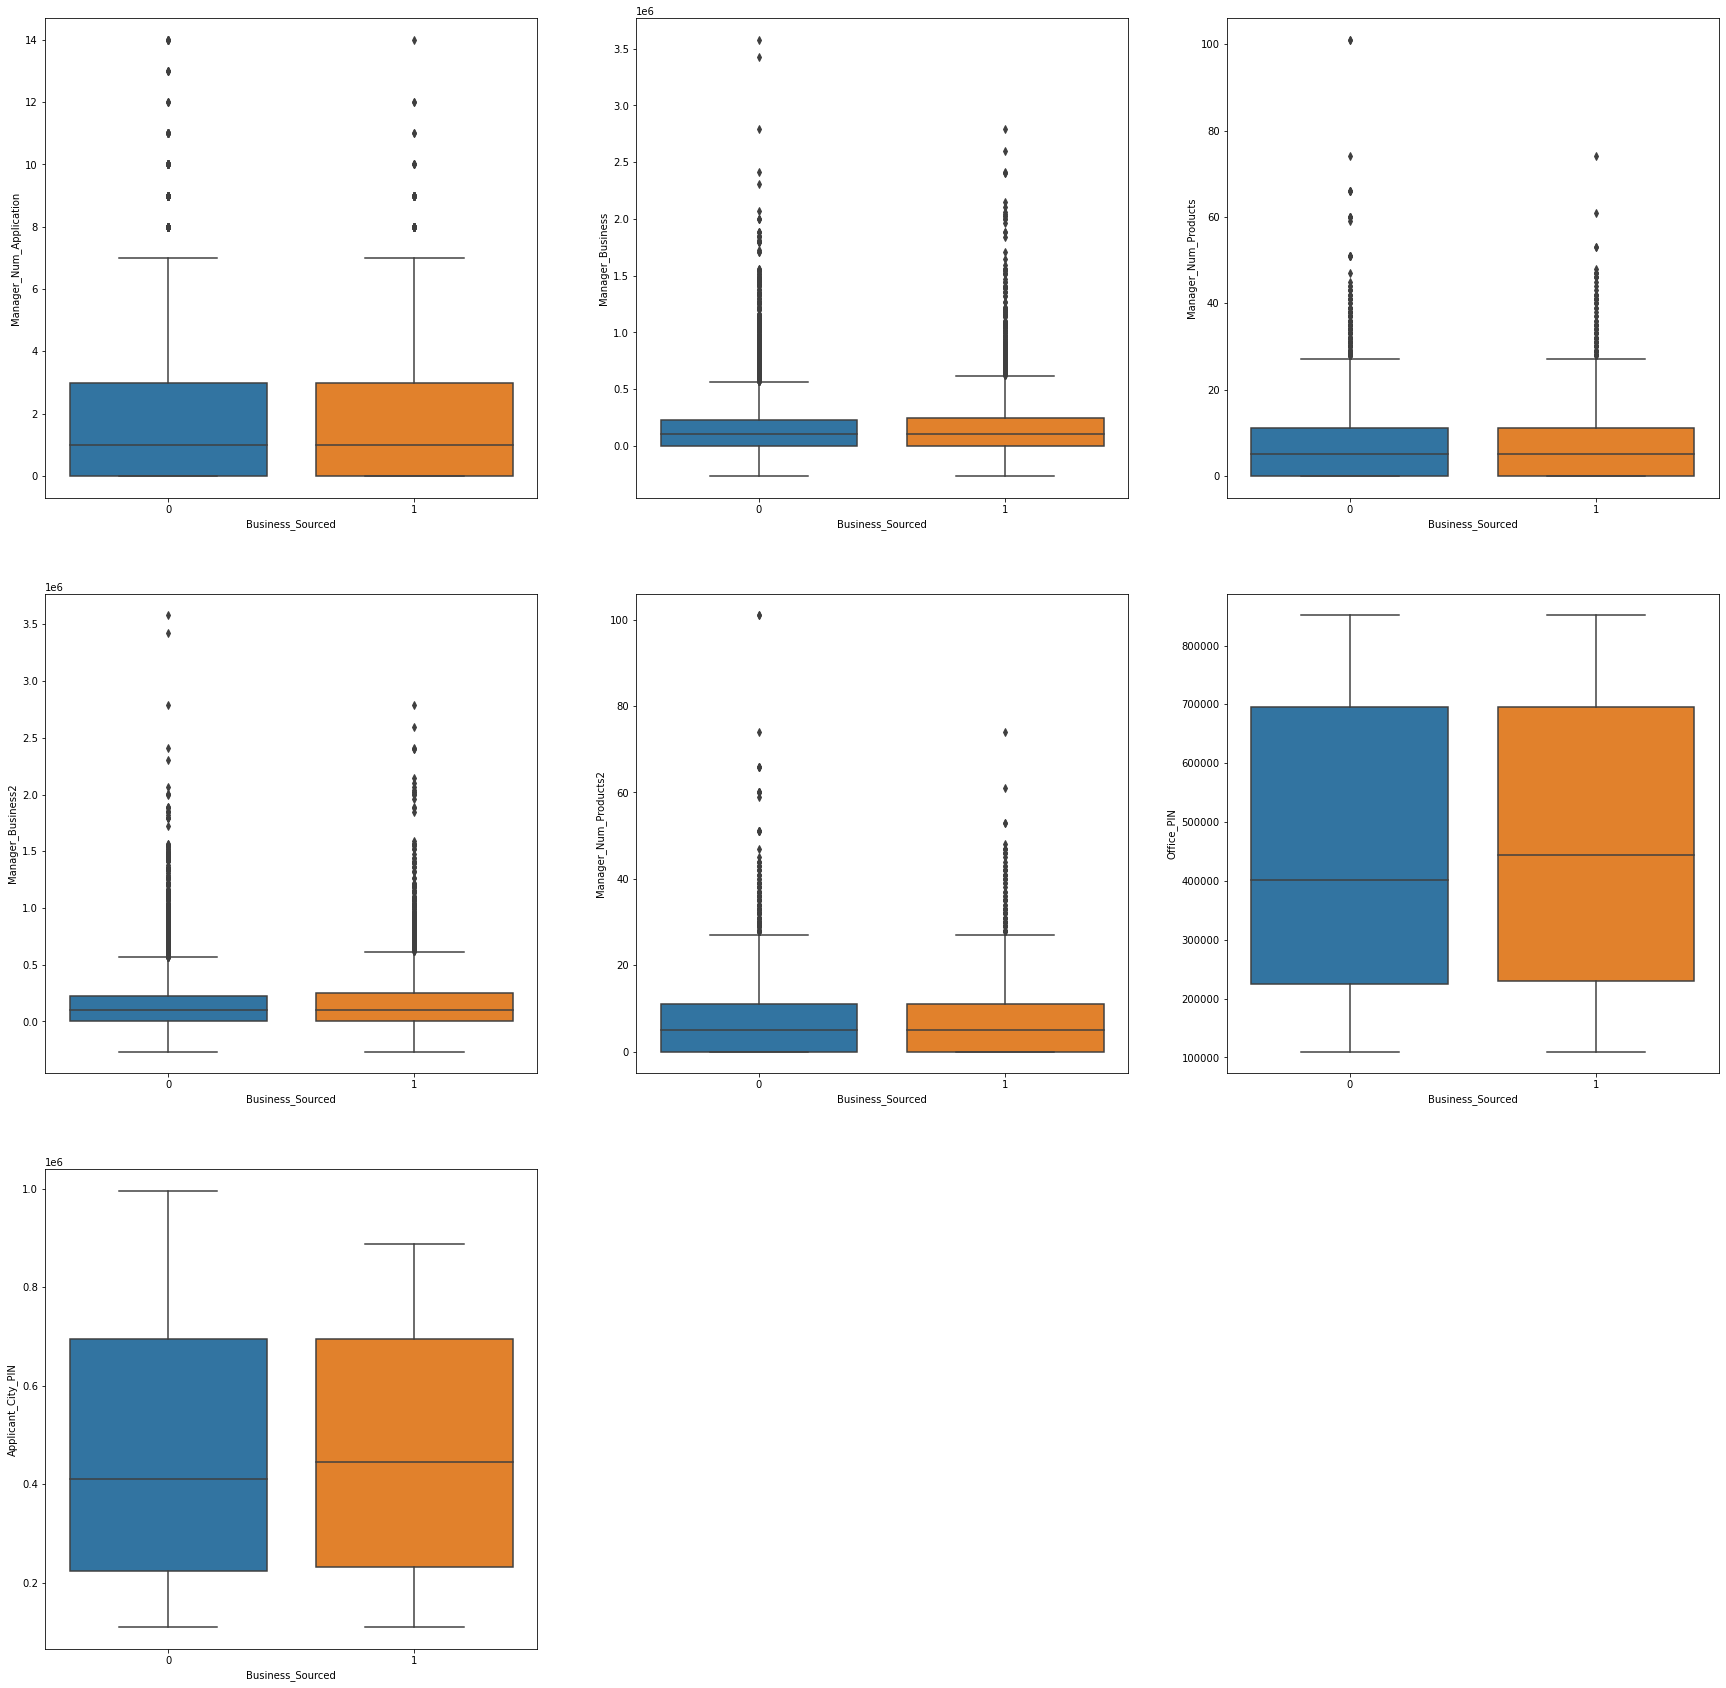

In [87]:
#Visualizing the relationship bwtween the categorical vs continuous predictors through box plot
plt.figure(figsize=(30,30))
for i,feature in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x='Business_Sourced',y=feature,data=train_data)

In [73]:
#Anova test to show the statistica strength b/w continuos predictor variables with the target varlable
def FunctionAnova(InpData,TargetVariable,ContPredictors):
    from scipy.stats import f_oneway
    
    selectedPredictors =[]
    
    for predictors in ContPredictors:
        CategoryGroupList = InpData.groupby(predictors)[TargetVariable].apply(list)
        AnovaResult = f_oneway(*CategoryGroupList)
        
        if(AnovaResult[1]<0.05):
            print(predictors,'is correlated with',TargetVariable,'| P-Value:',AnovaResult[1])
            selectedPredictors.append(predictors)
        else:
                print(predictors,'is correlated with',TargetVariable,'| P-Value:',AnovaResult[1])
    return(selectedPredictors)
        

In [74]:
FunctionAnova(InpData=train_data, TargetVariable='Business_Sourced', ContPredictors=cont_cols)

Manager_Num_Application is correlated with Business_Sourced | P-Value: 0.005464570225453849
Manager_Business is correlated with Business_Sourced | P-Value: 0.0001403365267110078
Manager_Num_Products is correlated with Business_Sourced | P-Value: 0.01765532876213676
Manager_Business2 is correlated with Business_Sourced | P-Value: 0.00012090495664254702
Manager_Num_Products2 is correlated with Business_Sourced | P-Value: 0.013385175517329928
Office_PIN is correlated with Business_Sourced | P-Value: 4.7854121950323e-28
Applicant_City_PIN is correlated with Business_Sourced | P-Value: 1.9460704664812033e-06


['Manager_Num_Application',
 'Manager_Business',
 'Manager_Num_Products',
 'Manager_Business2',
 'Manager_Num_Products2',
 'Office_PIN',
 'Applicant_City_PIN']

In [76]:
cat_cols = ['Applicant_Gender',
 'Applicant_Marital_Status',
 'Applicant_Occupation',
 'Applicant_Qualification',
 'Manager_Joining_Designation',
 'Manager_Current_Designation',
 'Manager_Grade',
 'Manager_Status',
 'Manager_Gender',
 'Manager_Num_Coded',
 'Application_Receipt_month',
 'Manager_YOP',
 'Application_Receipt_year','Applicant_Age_Bin','Manager_Age_Bin' ]

In [274]:
train_data.shape

(9527, 23)

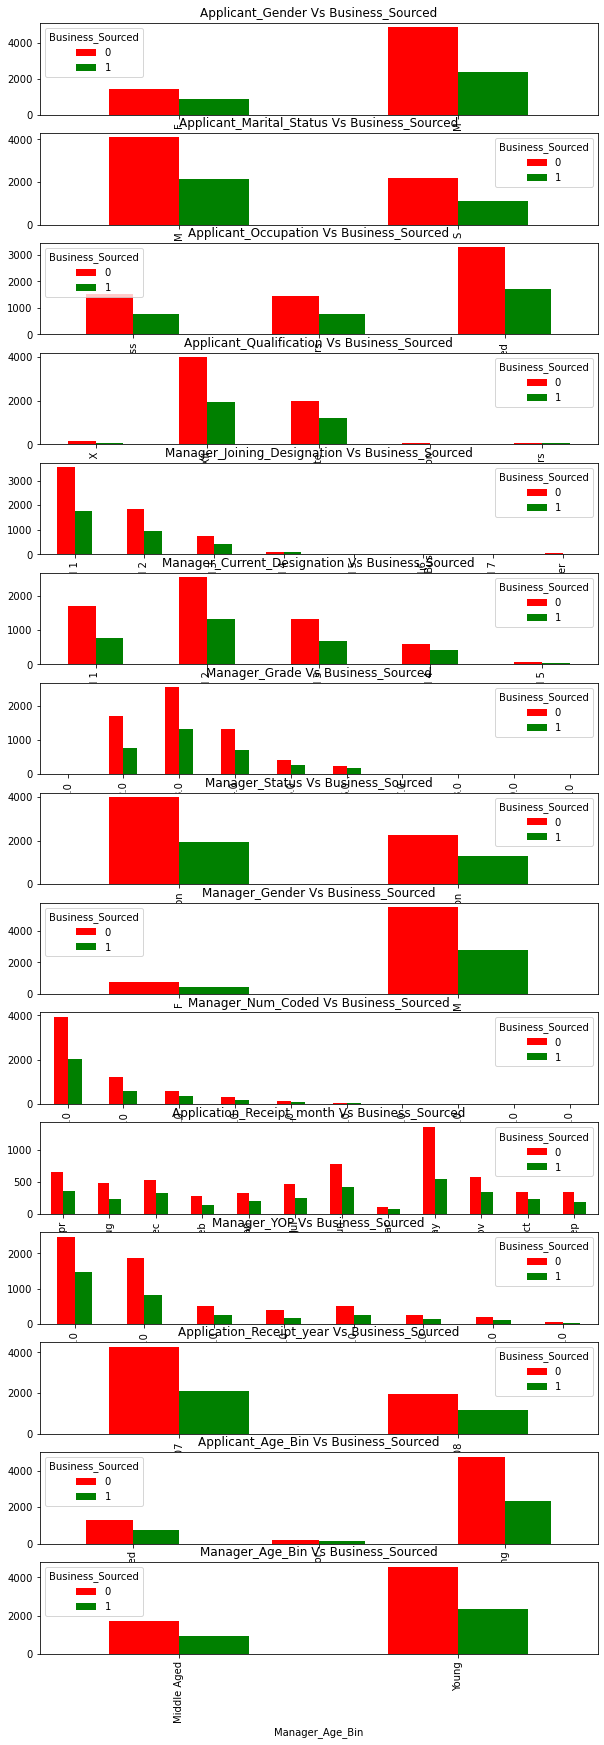

In [88]:
#Visualizing the relationship between the categorical vs categorical predictors using Grouped Var Charts
fig,plotCanvas = plt.subplots(nrows=len(cat_cols),ncols=1, figsize=(10,30))

for categoricalcols,i in zip(cat_cols,range(len(cat_cols))):
    CrossTabResult=pd.crosstab(index=train_data[categoricalcols], columns=train_data['Business_Sourced'])
    CrossTabResult.plot.bar(color=['red','green'], ax=plotCanvas[i], title=categoricalcols+' Vs '+'Business_Sourced')

In [77]:
#Chi sq test to show the statistical strength b/w the categorical predictors with the target variable
def chisqTest(targetVariable,predictorvariables,inpData):
    from scipy.stats import chi2_contingency
    
    #Creating empty list
    selectedPredictors=[]
    
    print('## Chisq Test ##')
    for predictors in predictorvariables:
        crossTab = pd.crosstab(index=inpData[targetVariable],columns=inpData[predictors])
        crossTabResult = chi2_contingency(crossTab)
        
        #if P-Value is less than 0.05 we will reject the H0
        if(crossTabResult[1]<0.05):
            print(predictors,'is corelated with the',targetVariable,'| P-Value:',crossTabResult[1])
            selectedPredictors.append(predictors)
        else:
            print(predictors,'is not corelated with the',targetVariable,'| P-Value:',crossTabResult[1])
    return(selectedPredictors)

In [78]:
chisqTest(targetVariable='Business_Sourced',predictorvariables=cat_cols, inpData=train_data)

## Chisq Test ##
Applicant_Gender is corelated with the Business_Sourced | P-Value: 1.1125399107175522e-06
Applicant_Marital_Status is not corelated with the Business_Sourced | P-Value: 0.5778356188939744
Applicant_Occupation is not corelated with the Business_Sourced | P-Value: 0.6646815369074905
Applicant_Qualification is corelated with the Business_Sourced | P-Value: 6.283223670309604e-07
Manager_Joining_Designation is corelated with the Business_Sourced | P-Value: 3.0058065987450532e-06
Manager_Current_Designation is corelated with the Business_Sourced | P-Value: 1.050593250285465e-06
Manager_Grade is corelated with the Business_Sourced | P-Value: 1.7001862285582955e-05
Manager_Status is corelated with the Business_Sourced | P-Value: 3.848293555146792e-05
Manager_Gender is corelated with the Business_Sourced | P-Value: 0.0014777314571216876
Manager_Num_Coded is not corelated with the Business_Sourced | P-Value: 0.6523531884571652
Application_Receipt_month is corelated with the Busi

['Applicant_Gender',
 'Applicant_Qualification',
 'Manager_Joining_Designation',
 'Manager_Current_Designation',
 'Manager_Grade',
 'Manager_Status',
 'Manager_Gender',
 'Application_Receipt_month',
 'Manager_YOP',
 'Application_Receipt_year',
 'Applicant_Age_Bin']

In [81]:
selectedPredictors = ['Manager_Num_Application',
 'Manager_Business',
 'Manager_Num_Products',
 'Manager_Business2',
 'Manager_Num_Products2',
 'Office_PIN',
 'Applicant_City_PIN','Applicant_Gender',
 'Applicant_Qualification',
 'Manager_Joining_Designation',
 'Manager_Current_Designation',
 'Manager_Grade',
 'Manager_Status',
 'Manager_Gender',
 'Application_Receipt_month',
 'Manager_YOP',
 'Application_Receipt_year',
 'Applicant_Age_Bin']

In [82]:
DataForML = train_data[selectedPredictors]

In [83]:
DataForML.head()

DataForML.shape

(9527, 18)

In [282]:
DataForML.columns

Index(['Manager_Num_Application', 'Manager_Business', 'Manager_Num_Products',
       'Manager_Business2', 'Manager_Num_Products2', 'Office_PIN',
       'Applicant_City_PIN', 'Applicant_Gender', 'Applicant_Qualification',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender',
       'Application_Receipt_month', 'Manager_YOP', 'Application_Receipt_year',
       'Applicant_Age_Bin', 'Applicant_Age_Bin'],
      dtype='object')

In [84]:
DataForML['Manager_YOP'].unique()

[2.0, 1.0, 4.0, 3.0, 5.0, 0.0, 6.0, 7.0]
Categories (8, float64): [2.0, 1.0, 4.0, 3.0, 5.0, 0.0, 6.0, 7.0]

In [85]:
test_copy_data['Manager_YOP'].unique()

[0.0, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0]
Categories (9, float64): [0.0, 1.0, 3.0, 2.0, ..., 5.0, 6.0, 7.0, 8.0]

In [ ]:
delete_columns =['Applicant_Marital_Status','Applicant_Occupation','Manager_Num_Coded','Manager_Age_Bin']
for i in delete_columns:
    test_copy_data.drop(i,axis=1,inplace=True)

In [97]:
#One hot encoding
DataForML['Applicant_Gender'].replace({'M':0,"F":1},inplace=True)
DataForML['Manager_Gender'].replace({'M':0,"F":1},inplace=True)
DataForML['Manager_Status'].replace({'Confirmation':1,'Probation':0},inplace=True)

DataForML['Manager_Grade'].replace({1.0:1,2.0:2,3.0:3,4.0:4,5.0:5,6.0:6,7.0:7,8.0:8,9.0:9,10.0:10},inplace=True)
DataForML['Application_Receipt_month'].replace({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,
                                                     'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12},inplace=True)
DataForML['Application_Receipt_year'].replace({2007:0,2008:1},inplace=True)



################----------------------------------------------------------------#############################

#Test Data Label encoding
test_copy_data['Applicant_Gender'].replace({'M':0,"F":1},inplace=True)
test_copy_data['Manager_Gender'].replace({'M':0,"F":1},inplace=True)
test_copy_data['Manager_Status'].replace({'Confirmation':1,'Probation':0},inplace=True)

test_copy_data['Manager_Grade'].replace({2.0:2,3.0:3,4.0:4,5.0:5,7.0:7,8.0:8},inplace=True)
test_copy_data['Application_Receipt_month'].replace({'Jan':1,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12},inplace=True)
test_copy_data['Application_Receipt_year'].replace({2008:1,2009:0},inplace=True)
test_copy_data['Manager_YOP'].replace({8.0:7.0},inplace=True)

In [98]:
#Label Encoding
DataForML['Applicant_Qualification'].replace({'Others':0,'Class X':1,'Class XII':2,'Graduate':3,
                                              'Masters of Business Administration':4},inplace=True)

DataForML['Manager_Joining_Designation'].replace({'Level 1':1,'Level 2':2,'Level 3':3,'Level 4':4,'Level 5':5, 'Level 6':6,
                                                 'Level 7':7, 'Other':0},inplace=True)

DataForML['Manager_Current_Designation'].replace({'Level 1':1,'Level 2':2,'Level 3':3,'Level 4':4,'Level 5':5},inplace=True)


########################----------------------------------------------------######################

#Test Data Label Encoding
test_copy_data['Applicant_Qualification'].replace({'Others':0,'Class X':1,'Class XII':2,'Graduate':3,
                                              'Masters of Business Administration':4},inplace=True)

test_copy_data['Manager_Joining_Designation'].replace({'Level 1':1,'Level 2':2,'Level 3':3,'Level 4':4,'Level 5':5, 'Level 6':6},inplace=True)

test_copy_data['Manager_Current_Designation'].replace({'Level 1':1,'Level 2':2,'Level 3':3,'Level 4':4,'Level 5':5},inplace=True)

In [73]:
DataForML.head()

,Manager_Num_Application,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Applicant_Age,Manager_Age,Applicant_Gender,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Application_Receipt_month,Manager_YOP,Application_Receipt_year
0,2.0,335249.0,28.0,335249.0,28.0,50,43,0,3,1,2,3.0,1,0,Apr,16,2007
1,2.0,335249.0,28.0,335249.0,28.0,38,43,0,2,1,2,3.0,1,0,Apr,16,2007
2,0.0,357184.0,24.0,357184.0,24.0,55,52,0,2,1,1,2.0,1,0,Apr,15,2007
3,0.0,318356.0,22.0,318356.0,22.0,33,43,0,2,1,3,4.0,1,1,Apr,18,2007
4,2.0,230402.0,17.0,230402.0,17.0,36,50,0,2,1,1,2.0,1,0,Apr,15,2007


In [99]:
#Creating dummies of the train data
DataForML_Numeric = pd.get_dummies(DataForML, columns=['Manager_YOP','Applicant_Age_Bin'])

In [100]:
#Creating dummies of the test data
test_copy_data = pd.get_dummies(test_copy_data, columns=['Manager_YOP','Applicant_Age_Bin'])

In [101]:
DataForML_Numeric.shape

(9527, 27)

In [102]:
DataForML_Numeric['Business_Sourced'] = train_data['Business_Sourced']

DataForML_Numeric.shape

(9527, 28)

In [104]:
DataForML_Numeric.columns

Index(['Manager_Num_Application', 'Manager_Business', 'Manager_Num_Products',
       'Manager_Business2', 'Manager_Num_Products2', 'Office_PIN',
       'Applicant_City_PIN', 'Applicant_Gender', 'Applicant_Qualification',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender',
       'Application_Receipt_month', 'Application_Receipt_year',
       'Manager_YOP_0.0', 'Manager_YOP_1.0', 'Manager_YOP_2.0',
       'Manager_YOP_3.0', 'Manager_YOP_4.0', 'Manager_YOP_5.0',
       'Manager_YOP_6.0', 'Manager_YOP_7.0', 'Applicant_Age_Bin_Middle Aged',
       'Applicant_Age_Bin_Senior', 'Applicant_Age_Bin_Young',
       'Business_Sourced'],
      dtype='object')

In [103]:
DataForML_Numeric.shape

(9527, 28)

In [184]:
test_copy_data.columns

Index(['Applicant_Gender', 'Applicant_Qualification',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender',
       'Manager_Num_Application', 'Manager_Business', 'Manager_Num_Products',
       'Manager_Business2', 'Manager_Num_Products2',
       'Application_Receipt_month', 'Application_Receipt_year',
       'Applicant_Age', 'Manager_Age', 'Manager_YOP_0.0', 'Manager_YOP_1.0',
       'Manager_YOP_2.0', 'Manager_YOP_3.0', 'Manager_YOP_4.0',
       'Manager_YOP_5.0', 'Manager_YOP_6.0', 'Manager_YOP_7.0',
       'Manager_YOP_8.0'],
      dtype='object')

In [105]:
targetvariable = 'Business_Sourced'
predictors = ['Manager_Num_Application', 'Manager_Business', 'Manager_Num_Products',
       'Manager_Business2', 'Manager_Num_Products2', 'Office_PIN',
       'Applicant_City_PIN', 'Applicant_Gender', 'Applicant_Qualification',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender',
       'Application_Receipt_month', 'Application_Receipt_year',
       'Manager_YOP_0.0', 'Manager_YOP_1.0', 'Manager_YOP_2.0',
       'Manager_YOP_3.0', 'Manager_YOP_4.0', 'Manager_YOP_5.0',
       'Manager_YOP_6.0', 'Manager_YOP_7.0', 'Applicant_Age_Bin_Middle Aged',
       'Applicant_Age_Bin_Senior', 'Applicant_Age_Bin_Young']

In [106]:
x = DataForML_Numeric[predictors].values
y = DataForML_Numeric[targetvariable].values

#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x, y ,test_size=0.3,random_state=26)




In [107]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x)

# Generating the standardized values of X
X=PredictorScalerFit.transform(x)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [103]:
x = DataForML_Numeric.drop('Business_Sourced',axis=1)
y = DataForML_Numeric['Business_Sourced']

In [118]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(5411, 24)
(2319, 24)
(5411,)
(2319,)


In [104]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
rf=RandomForestClassifier()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for model,name in zip([rf,dt,lr,knn],['Random_forest',"Decision_tree","logistic_regression","knn"]):
    roc_auc=[]
    for train_idx,test_idx in kf.split(x,y):#indexes of test and train willbe stored
        Xtrain,Xtest=x.iloc[train_idx,:],x.iloc[test_idx,:]
        Ytrain,Ytest=y.iloc[train_idx],y.iloc[test_idx]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        #cm=metrics.confusion_matrix(Ytest,Y_predict)
        mse=roc_auc_score(Ytest,Y_predict)
        roc_auc.append(np.sqrt(mse))
    print(model.score(Xtrain,Ytrain))
    print('ROC AUC Score',(np.mean(roc_auc),name))

0.9966041397153945
ROC AUC Score (0.7426327708235744, 'Random_forest')
0.9966041397153945
ROC AUC Score (0.7371737886811787, 'Decision_tree')
0.6507115135834411
ROC AUC Score (0.7073526052313794, 'logistic_regression')
0.7336675291073739
ROC AUC Score (0.7191082550402812, 'knn')


# Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression

dt_model = LogisticRegression(C=9,penalty='l2',solver='newton-cg',random_state=787)
                       

from sklearn.metrics import f1_score,roc_auc_score
# fitting the model
dt_model.fit(x_train, y_train)

# make training prediction
train_yhat = dt_model.predict(x_train)
train_score = roc_auc_score(y_train, train_yhat)

# make test prediction
test_yhat = dt_model.predict(x_test)
test_score = roc_auc_score(y_test, test_yhat)

print(train_score)
print(test_score)

0.5061338000975479
0.5063670299563944


# Random Forest

In [402]:
from sklearn.ensemble import RandomForestClassifier

dt_model = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features='log2', max_leaf_nodes=97,
                       min_samples_split=67, n_estimators=200, random_state=10)
                       

from sklearn.metrics import f1_score,roc_auc_score
# fitting the model
dt_model.fit(x_train, y_train)

# make training prediction
train_yhat = dt_model.predict(x_train)
train_score = roc_auc_score(y_train, train_yhat)

# make test prediction
test_yhat = dt_model.predict(x_test)
test_score = roc_auc_score(y_test, test_yhat)

print(train_score)
print(test_score)

test_copy_data['Business_Sourced']=dt_model.predict_proba(test_copy_data[predictors])[:, 1]
test_copy_data['ID']=test_data['ID']

Random_Forest_3 = test_copy_data[['ID','Business_Sourced']]

print(Random_Forest_3.head())
print(Random_Forest_3.tail())

Random_Forest_3.to_csv('C:\\Users\\ashi.goel\\Downloads\\Capestone Project\\Random_Forest_3.csv',index=False)



0.7147291180931191
0.5899043840356267
           ID  Business_Sourced
0  FIN1009528          0.531139
1  FIN1009529          0.527245
2  FIN1009530          0.523420
3  FIN1009531          0.527243
4  FIN1009532          0.384896
              ID  Business_Sourced
5040  FIN1014568          0.559611
5041  FIN1014569          0.587394
5042  FIN1014570          0.498671
5043  FIN1014571          0.409499
5044  FIN1014572          0.531484


In [118]:
from sklearn.ensemble import RandomForestClassifier

dt_model = RandomForestClassifier(class_weight='balanced', max_depth=15, max_leaf_nodes=92,
                       min_samples_split=77, n_estimators=500, random_state=10)
                       

from sklearn.metrics import f1_score,roc_auc_score
# fitting the model
dt_model.fit(x_train, y_train)

# make training prediction
train_yhat = dt_model.predict(x_train)
train_score = roc_auc_score(y_train, train_yhat)

# make test prediction
test_yhat = dt_model.predict(x_test)
test_score = roc_auc_score(y_test, test_yhat)

print(train_score)
print(test_score)


test_copy_data['Business_Sourced']=dt_model.predict_proba(test_copy_data[predictors])[:, 1]
test_copy_data['ID']=test_data['ID']

Random_Forest_13 = test_copy_data[['ID','Business_Sourced']]

print(Random_Forest_13.head())
print(Random_Forest_13.tail())

Random_Forest_13.to_csv('C:\\Users\\ashi.goel\\Downloads\\Capestone Project\\Random_Forest_13.csv',index=False)


0.7123413637614519
0.5934708813368771
           ID  Business_Sourced
0  FIN1009528          0.436097
1  FIN1009529          0.539860
2  FIN1009530          0.513372
3  FIN1009531          0.517060
4  FIN1009532          0.441108
              ID  Business_Sourced
5040  FIN1014568          0.598339
5041  FIN1014569          0.629998
5042  FIN1014570          0.546391
5043  FIN1014571          0.381463
5044  FIN1014572          0.453772


In [113]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params = {'criterion' :['gini', 'entropy'], 'max_depth': [5, 10,11, 15], 'max_leaf_nodes': list(range(2, 100, 5)), 'min_samples_split': list(range(2, 100, 5)),
         'n_estimators':[100,200,300,500],'max_features':['auto','log2']}

random_search_cv = RandomizedSearchCV(RandomForestClassifier(random_state=10,class_weight = 'balanced'), params,n_iter=300, verbose=1, cv=3, scoring = 'roc_auc')
random_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=10),
                   n_iter=300,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 11, 15],
                                        'max_features': ['auto', 'log2'],
                                        'max_leaf_nodes': [2, 7, 12, 17, 22, 27,
                                                           32, 37, 42, 47, 52,
                                                           57, 62, 67, 72, 77,
                                                           82, 87, 92, 97],
                                        'min_samples_split': [2, 7, 12, 17, 22,
                                                              27, 32, 37, 42,
                                                              47, 52, 57, 62,
                            

In [114]:
 random_search_cv.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=15, max_leaf_nodes=92,
                       min_samples_split=77, n_estimators=500, random_state=10)

# Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score,roc_auc_score

dt_model = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_leaf_nodes=42, min_samples_split=67,
                       random_state=10)
# fitting the model
dt_model.fit(x_train, y_train)

# make training prediction
train_yhat = dt_model.predict(x_train)
train_score = roc_auc_score(y_train, train_yhat)

# make test prediction
test_yhat = dt_model.predict(x_test)
test_score = roc_auc_score(y_test, test_yhat)

train_score, test_score



(0.620394769539651, 0.5698157537124863)

In [404]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params = {'criterion' :['gini', 'entropy'], 'max_depth': [5, 10,11, 15], 'max_leaf_nodes': list(range(2, 100, 5)), 'min_samples_split': list(range(2, 100, 5))}

random_search_cv = RandomizedSearchCV(DecisionTreeClassifier(random_state=10,class_weight = 'balanced'), params,n_iter=300, verbose=1, cv=3, scoring = 'roc_auc')
random_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=10),
                   n_iter=300,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 11, 15],
                                        'max_leaf_nodes': [2, 7, 12, 17, 22, 27,
                                                           32, 37, 42, 47, 52,
                                                           57, 62, 67, 72, 77,
                                                           82, 87, 92, 97],
                                        'min_samples_split': [2, 7, 12, 17, 22,
                                                              27, 32, 37, 42,
                                                              47, 52, 57, 62,
                                                              67, 72, 77, 82,
                        

In [405]:
random_search_cv.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_leaf_nodes=42, min_samples_split=67,
                       random_state=10)

# XG Boost

In [122]:
import xgboost as xgb

from sklearn.metrics import recall_score,roc_auc_score
model = xgb.XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                learning_rate=0.1, max_delta_step=0,
                max_depth=30, min_child_weight=1,
                monotone_constraints='()', n_estimators=200, n_jobs=8,
                num_parallel_tree=200, objective='binary:logistic',
                random_state=0, reg_alpha=1, reg_lambda=0, scale_pos_weight=1,
                tree_method='exact', validate_parameters=1, verbosity=None)

model.fit(x_train, y_train)

# make training prediction
train_yhat = model.predict(x_train)
train_score = roc_auc_score(y_train, train_yhat)

# make test prediction
test_yhat = model.predict(x_test)
test_score = roc_auc_score(y_test, test_yhat)

train_score, test_score

test_copy_data['Business_Sourced']=model.predict_proba(test_copy_data[predictors])[:, 1]
test_copy_data['ID']=test_data['ID']

xg_boost_1 = test_copy_data[['ID','Business_Sourced']]

print(xg_boost_1.head())
print(xg_boost_1.tail())

xg_boost_1.to_csv('C:\\Users\\ashi.goel\\Downloads\\Capestone Project\\xg_boost_1.csv',index=False)


[21:58:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
           ID  Business_Sourced
0  FIN1009528          0.479276
1  FIN1009529          0.474715
2  FIN1009530          0.496181
3  FIN1009531          0.493902
4  FIN1009532          0.477629
              ID  Business_Sourced
5040  FIN1014568          0.491404
5041  FIN1014569          0.502633
5042  FIN1014570          0.493437
5043  FIN1014571          0.471326
5044  FIN1014572          0.492725


In [413]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_dist = {"max_depth": [5, 10, 15, 30, 50],
              "n_estimators": [100, 200, 300],
              "learning_rate": [0.05, 0.1, 0.15, 0.2, 0.3],
             'reg_alpha':[0,0.001,0.1,1,10],
             'reg_lambda':[0,0.001,0.1,1,10]}

grid_search = RandomizedSearchCV(model, param_dist, cv = 3, n_iter = 30,  
                                   verbose=10, n_jobs=-1, scoring = "roc_auc")

grid_search.fit(x_train, y_train)

grid_search.best_estimator_

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[14:48:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', learning_rate=0.1, max_delta_step=0,
                max_depth=30, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=200, n_jobs=8,
                num_parallel_tree=200, objective='binary:logistic',
                random_state=0, reg_alpha=1, reg_lambda=0, scale_pos_weight=1,
                tree_method='exact', validate_parameters=1, verbosity=None)

# LGBM


In [123]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [129]:
from lightgbm import LGBMClassifier

 

model = LGBMClassifier( num_leaves=31, max_depth=- 1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000,boosting_type='gbdt')
model.fit(x_train, y_train)

 

# make training prediction
train_yhat = model.predict(x_train)
train_score = roc_auc_score(y_train, train_yhat)

 

# make test prediction
test_yhat = model.predict(x_test)
test_score = roc_auc_score(y_test, test_yhat)

 

train_score, test_score

test_copy_data['Business_Sourced']=model.predict_proba(test_copy_data[predictors])[:, 1]
test_copy_data['ID']=test_data['ID']

LGBM_file_1 = test_copy_data[['ID','Business_Sourced']]

print(LGBM_file_1.head())
print(LGBM_file_1.tail())

LGBM_file_1.to_csv('C:\\Users\\ashi.goel\\Downloads\\Capestone Project\\LGBM_file_1.csv',index=False)


           ID  Business_Sourced
0  FIN1009528          0.238222
1  FIN1009529          0.335359
2  FIN1009530          0.268759
3  FIN1009531          0.342256
4  FIN1009532          0.308130
              ID  Business_Sourced
5040  FIN1014568          0.480713
5041  FIN1014569          0.639279
5042  FIN1014570          0.376881
5043  FIN1014571          0.156416
5044  FIN1014572          0.300580
